In [1]:
# increase the width of the notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### HELLENIC OPEN UNIVERSITY - SCHOOL OF SCIENCE AND TECHNOLOGY
### DATA SCIENCE AND MACHINE LEARNING : DAMA61 ACAD. YEAR 2023-24

#### <center> WRITTEN ASSIGNMENT 5 - SOLUTIONS </center>

### Problem 1

Work with the MNIST dataset and:
1) Split it into a training (5/7), a validation (1/7), and a test (1/7) set.</br>
2) Built a convolutional neural network (CNN). For the features extractor part of the CNN, create three 2D convolutional layers with 3x3 kernels, where each one of the first two is followed by a 2x2 max polling layer. For the classification part of your model use two fully connected layers (the second one should be the output layer).</br>
3) Compile the model using the Adam optimizer, a loss function of your choice and add accuracy in your metrics.</br>
4) Fit the model on the training data (allow 100 epochs) and use early stopping with patience 5 epochs to monitor the validation set.</br>
5) Plot the history of the loss and accuracy of the training process for the training and the validation set.</br>
6) Try two configurations of the number of kernels/filters and comment on how they affect the accuracy of your model on the test set.</br>
<i>Feel free to take any action needed to solve this problem.</i>

In [2]:
# import the needed packages
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
# read the data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# split and normalize the training, validation and test sets
X_train, y_train = X_train_full[:-10000]/255., y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:]/255., y_train_full[-10000:]
X_test = X_test/255.

In [5]:
# reshape the input data to 28,28,1
X_train = X_train.reshape((-1, 28, 28, 1))
X_valid = X_valid.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

#### First configuration of 16, 32 and 64 kernels/filters.

In [6]:
# fix the random numbers generator
np.random.seed(42)
tf.random.set_seed(42)

# create a sequantial model of an input, three convolutional hidden and an output layer
model = Sequential()
model.add(Input(shape = (28, 28, 1)))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,442 (384.54 KB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# compile the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8504 - loss: 0.4929 - val_accuracy: 0.9818 - val_loss: 0.0667
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9807 - loss: 0.0670 - val_accuracy: 0.9840 - val_loss: 0.0578
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9863 - loss: 0.0448 - val_accuracy: 0.9862 - val_loss: 0.0504
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9908 - loss: 0.0295 - val_accuracy: 0.9862 - val_loss: 0.0480
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9924 - loss: 0.0224 - val_accuracy: 0.9854 - val_loss: 0.0520
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9846 - val_loss: 0.0583
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9944 - loss: 0.0167 - val_accuracy: 0.9872 - val_loss: 0.0517
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9940 - loss: 0.0173 - val_accu

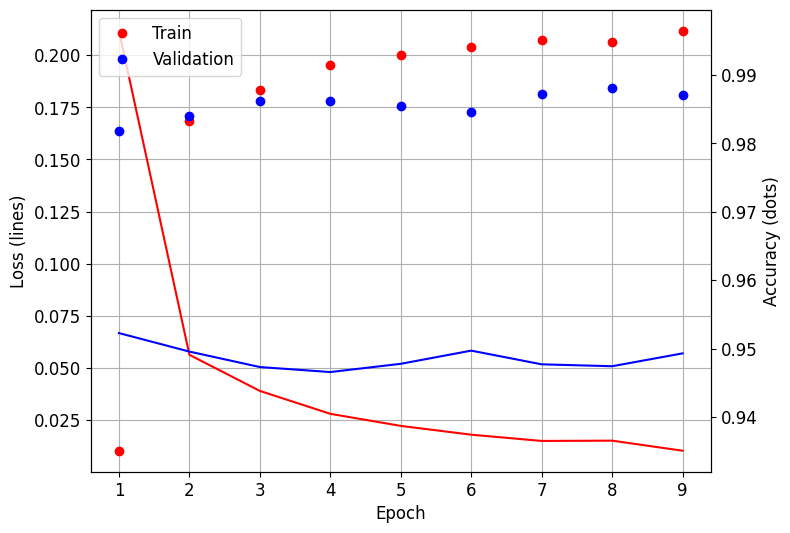

In [10]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0472

The accuracy on the test set is: 98.8%


#### Second configuration of 32, 64 and 128 kernels/filters.

In [12]:
# fix the random numbers generator
np.random.seed(42)
tf.random.set_seed(42)

# create a sequantial model of an input, three convolutional hidden and an output layer
model = Sequential()
model.add(Input(shape = (28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# compile the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8737 - loss: 0.4141 - val_accuracy: 0.9817 - val_loss: 0.0604
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9830 - loss: 0.0541 - val_accuracy: 0.9884 - val_loss: 0.0435
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9847 - val_loss: 0.0550
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9927 - loss: 0.0237 - val_accuracy: 0.9864 - val_loss: 0.0489
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9948 - loss: 0.0180 - val_accuracy: 0.9822 - val_loss: 0.0643
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9946 - loss: 0.0159 - val_accuracy: 0.9853 - val_loss: 0.0577
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9867 - val_loss: 0.0595


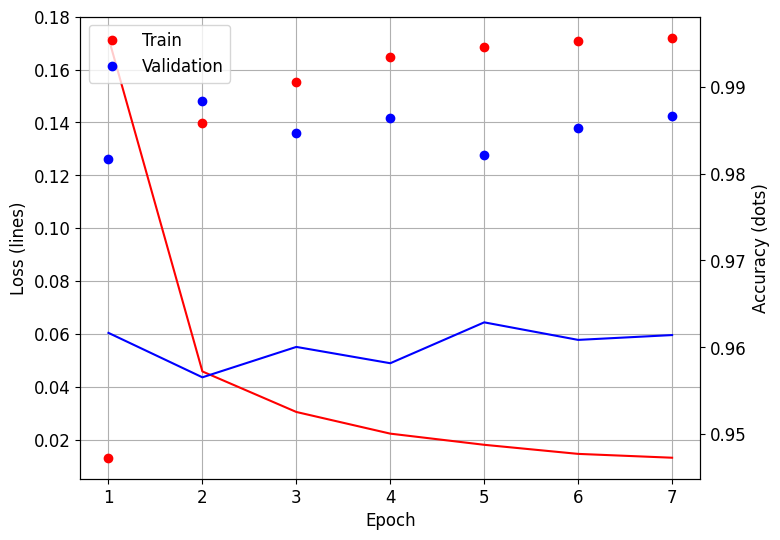

In [16]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.0402

The accuracy on the test set is: 99.0%


#### Comment:
By doubling the number of kernels in each layer, we observe a negligible increase in accuracy on the test set, which comes at the expense of a significant increase in computational cost and introduces instability to the training process.

### Problem 2

Create a time series of 10000 time steps using the formula:

f(t) = cos(t), where 0 < t < 14π (2.1)

1) Split it into a training (80%), a validation (10%), and a test (10%) set.</br>
2) Convert the time series into a supervised learning dataset using a window size of 10 time steps, i.e. use the 10 previous time steps to predict the next one.</br>
3) Built a recurrent neural network with one long-short term memory (LSTM) hidden layer of 100 nodes.</br>
4) Compile the model using the Adam optimizer, and a loss function of your choice.</br>
5) Fit the model on the training data (allow 100 epochs) and use early stopping with patience 5 epochs to monitor the validation set.</br>
6) Plot the history of the loss for the training and the validation set.</br>
7) Now change the window size to 20 and repeat the analysis. Comment on how the window size affects the predictions of your model on the test set.</br>
<i>Feel free to take any action needed to solve this problem.</i>

In [18]:
# import the needed packages
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [19]:
import numpy as np

# create the f(t) sequence
a, b, steps = (0, 14*np.pi, 10000)

# time, t
t = np.linspace(a, b, steps)

# f(t)
sequence = np.cos(t)

In [20]:
# set training and validation percent
tr = 80
valPercent = 10

# training size
trainSize = int( len(sequence)*tr/100.0 )

# validation size
valSize = int( len(sequence)*valPercent/100.0 )

# set the window size
window = 10

In [21]:
# split the time series into train, validation and test sets
train = sequence[ : trainSize]  # train set

val = sequence[ trainSize - window : trainSize + valSize]  # validation set

test = sequence[ trainSize + valSize - window : ]  # test set

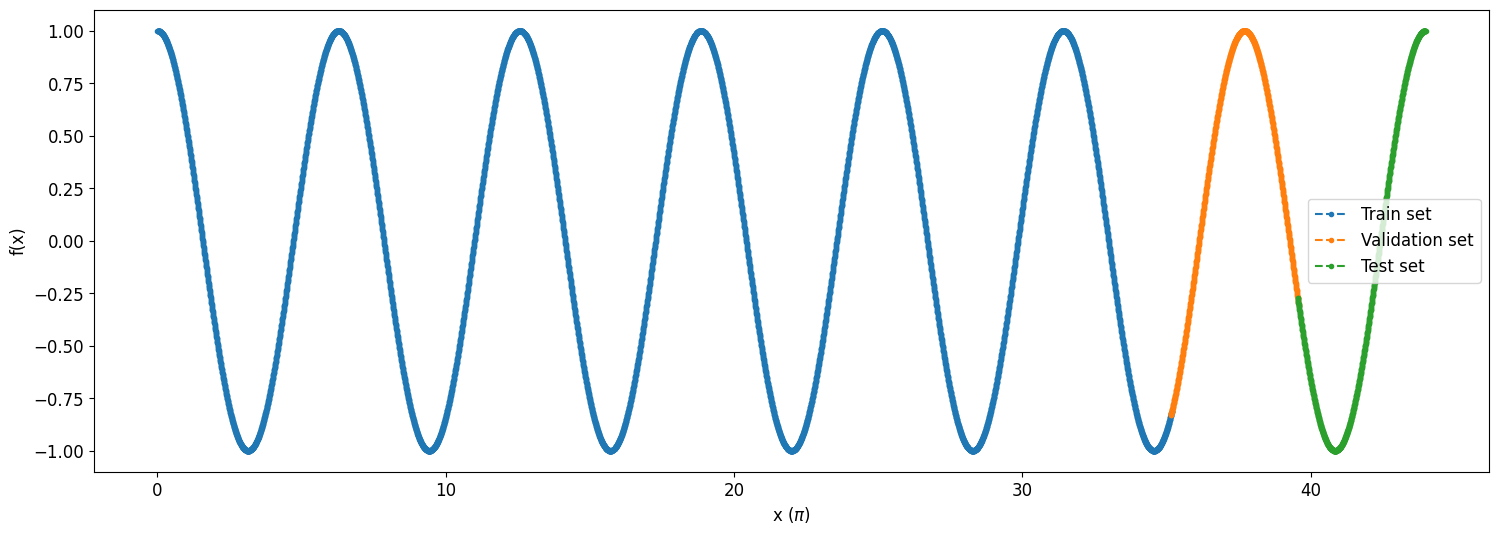

In [22]:
# plot the sets
fig = plt.figure( figsize = (18,6) )

plt.plot(t[:trainSize], train, "o--", markersize = 3, label = "Train set")
plt.plot(t[trainSize - window : trainSize + valSize], val, "o--", markersize = 3, label = "Validation set")
plt.plot(t[trainSize + valSize - window : ], test, "o--", markersize = 3, label = "Test set")

plt.ylabel("f(x)")
plt.xlabel(r"x $(\pi)$")

plt.legend()
plt.show()

In [23]:
# convert a sequence to a supervise learning data set
def create_dataset(dataset, look_back = 1) :
  dataX, dataY = [], []
  for i in range( len(dataset) - look_back ) :
    a = dataset[i : i + look_back]
    dataX.append(a)
    dataY.append(dataset[i + look_back])
  return np.array(dataX), np.array(dataY)

In [24]:
# train
x_train, y_train = create_dataset(train, window)
print ("Train:", x_train.shape, y_train.shape)

# validation
x_val, y_val = create_dataset(val, window)
print ("Validation:", x_val.shape, y_val.shape)

# test
x_test, y_test   = create_dataset(test, window)
print ("Test:", x_test.shape, y_test.shape)

Train: (7990, 10) (7990,)
Validation: (1000, 10) (1000,)
Test: (1000, 10) (1000,)


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
np.random.seed(44)
tf.random.set_seed(44)

# convert the datasets to LSTM friendly format [samples, timesteps, features]
x_train_lstm = np.reshape(x_train, (-1, window, 1))
x_val_lstm   = np.reshape(  x_val, (-1, window, 1))
x_test_lstm  = np.reshape( x_test, (-1, window, 1))

# create a sequantial model with an LSTM layer of 100 nodes
model = Sequential()
model.add(Input(shape = (window, 1)))
model.add(LSTM(100))
model.add(Dense(1))

# compile the model
model.compile(loss = "mse", optimizer = "adam")

# print the summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# use early stopping to avoid overfitting
earlyStopping = EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)

history = model.fit(x_train_lstm, y_train,
                   epochs = 100, batch_size = 32,
                   validation_data = (x_val_lstm, y_val),
                   callbacks = [earlyStopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0518 - val_loss: 3.7105e-04
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8655e-04 - val_loss: 3.1377e-04
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3833e-04 - val_loss: 2.7209e-04
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1502e-04 - val_loss: 2.5261e-04
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.0597e-04 - val_loss: 2.3234e-04
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.9133e-04 - val_loss: 1.8426e-04
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6551e-04 - val_loss: 1.5013e-04
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4815e-04 - val_loss: 1.2256e-04
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1542e-04 - val_loss: 3.1902e-04
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0364e-04 - val_loss: 6.1255e-05
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

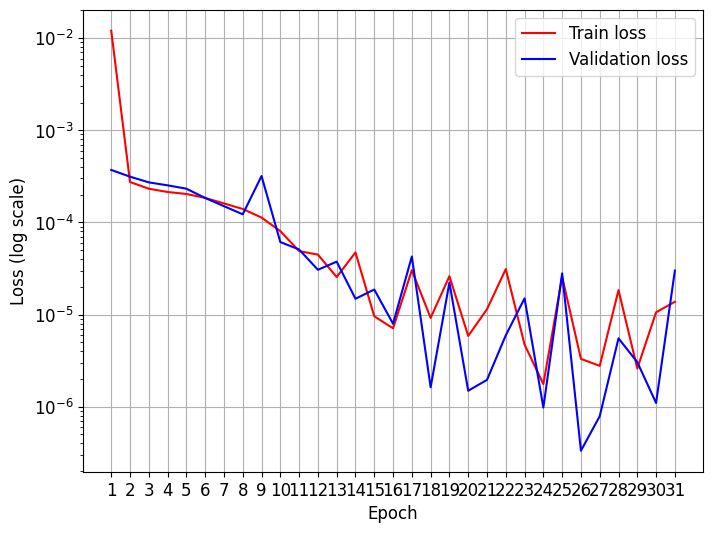

In [28]:
x_values = range(1, len(history.history['loss'])+1)
fig = plt.figure(figsize = (8,6))
plt.plot(x_values, history.history['loss'], "r-", label = "Train loss")
plt.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
plt.ylabel("Loss (log scale)")
plt.xlabel("Epoch")
plt.grid()
plt.yscale("log")
plt.xticks(x_values)
plt.legend()
plt.show()

In [29]:
def predictionOnPredictionLSTM(model, initialValue, nOfPredictions):
  # start the predictions
  inputs = initialValue
  # create an empty array
  predictions = []

  # loop over the test set data and make prediction using 
  for i in range(nOfPredictions) :
    v = model.predict(inputs.reshape(-1, inputs.shape[0], inputs.shape[1]), verbose = 0)[0]
    predictions.append(v)
    # create the next input
    inputs = np.roll(inputs, -1)
    inputs[-1] = v[0]
    inputs = np.expand_dims(inputs, axis = 0)[0]

  return np.array(predictions)

In [30]:
prediction_horizon = 30
predictions_LSTM_10 = predictionOnPredictionLSTM(model, x_test_lstm[0], prediction_horizon)

In [31]:
print ("True value  Pred value  Error (%)")
for y_true, y_pred in zip(y_test[:10], predictions_LSTM_10[:10]) :
  print(f"{y_true:10.6f} {y_pred[0]:10.6f} {100*abs((y_pred[0]-y_true)/y_true):10.6f}")

True value  Pred value  Error (%)
 -0.312780  -0.313062   0.090155
 -0.316955  -0.317298   0.108249
 -0.321123  -0.321578   0.141714
 -0.325286  -0.325895   0.187092
 -0.329442  -0.330237   0.241335
 -0.333592  -0.334600   0.302154
 -0.337736  -0.338978   0.367995
 -0.341873  -0.343369   0.437794
 -0.346003  -0.347771   0.511007
 -0.350126  -0.352182   0.587173


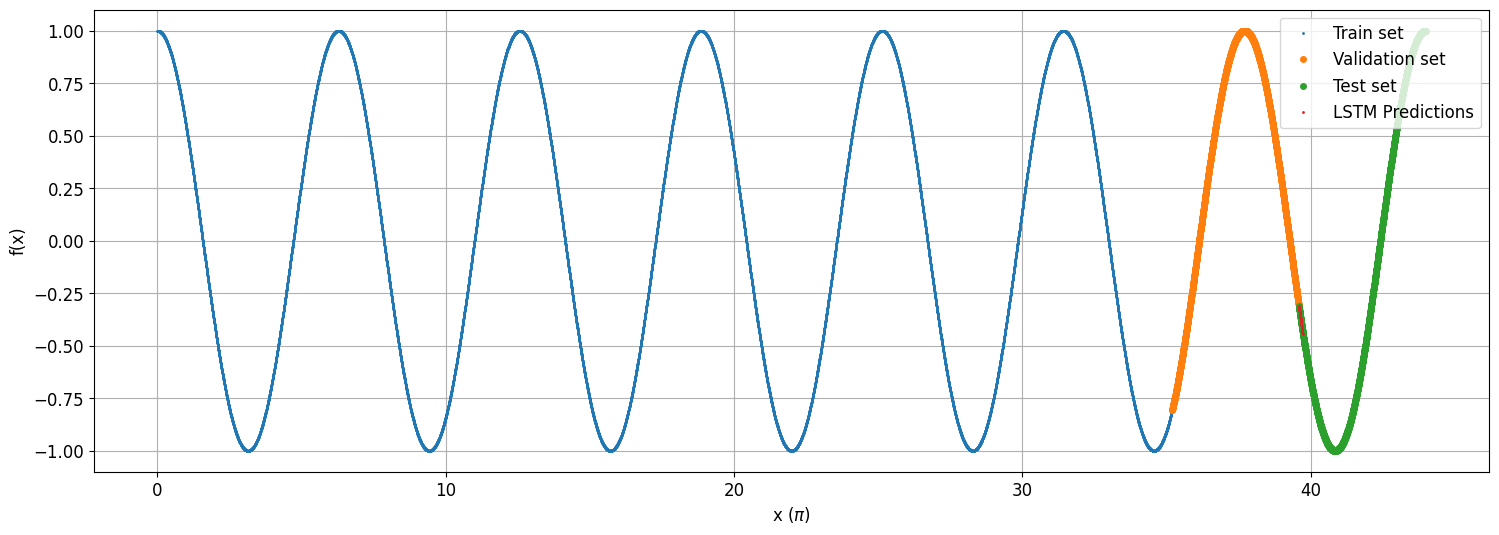

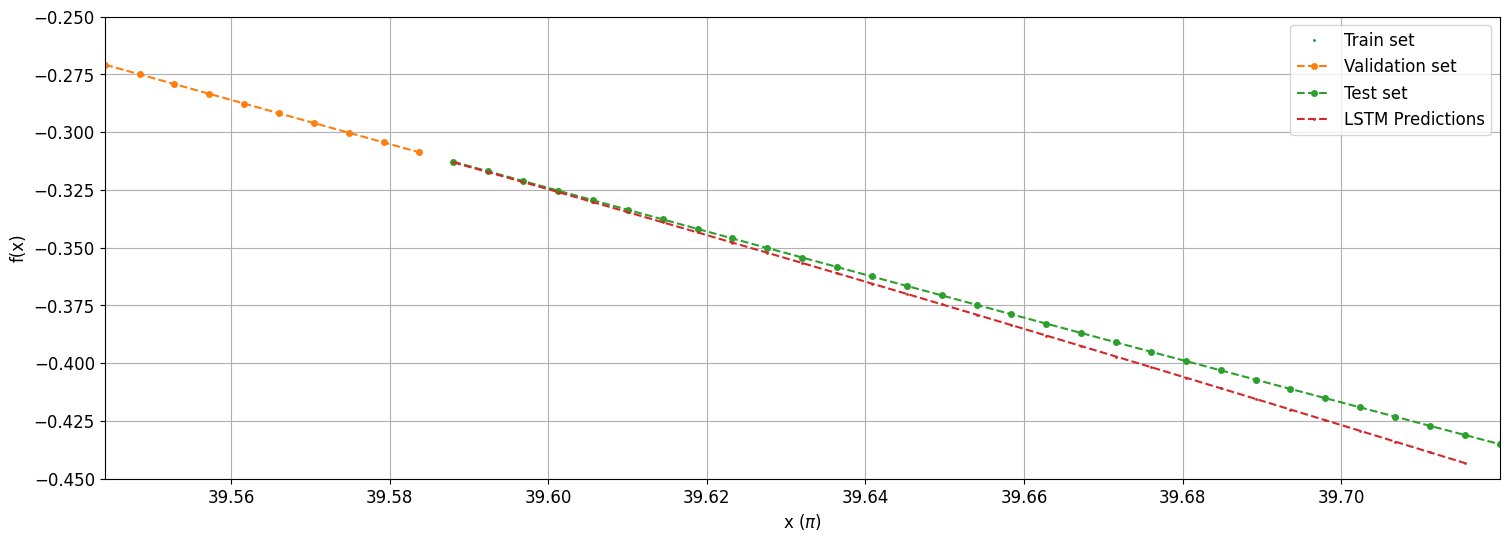

In [32]:
# plot the sequences
fig = plt.figure( figsize = (18,6) )

plt.plot(t[ : trainSize], train, "o", markersize = 1, label = "Train set")
plt.plot(t[trainSize : trainSize + valSize], y_val.flatten(), "o", markersize = 4, label = "Validation set")
plt.plot(t[trainSize + valSize : ], y_test.flatten(), "o", markersize = 4, label = "Test set")
plt.plot(t[trainSize + valSize : trainSize + valSize + prediction_horizon], predictions_LSTM_10.flatten(), "o", markersize = 1, label = "LSTM Predictions")

plt.ylabel("f(x)")
plt.xlabel(r"x $(\pi)$")

plt.legend()
plt.grid()
plt.show()

# zoom in
fig = plt.figure( figsize = (18,6) )

plt.plot(t[ : trainSize], train, "o", markersize = 1, label = "Train set")
plt.plot(t[trainSize : trainSize + valSize], y_val.flatten(), "o--", markersize = 4, label = "Validation set")
plt.plot(t[trainSize + valSize : ], y_test.flatten(), "o--", markersize = 4, label = "Test set")
plt.plot(t[trainSize + valSize : trainSize + valSize + prediction_horizon], predictions_LSTM_10.flatten(), "o--", markersize = 1, label = "LSTM Predictions")

plt.ylabel("f(x)")
plt.xlabel(r"x $(\pi)$")

plt.xlim(t[trainSize + valSize - window], t[trainSize + valSize + prediction_horizon])

plt.ylim(-0.45,-0.25)
plt.legend()
plt.grid()
plt.show()

#### Change the window size to 20

In [33]:
# set training and validation percent
tr = 80
valPercent = 10

# training size
trainSize = int( len(sequence)*tr/100.0 )

# validation size
valSize = int( len(sequence)*valPercent/100.0 )

# set the window size
window = 20

In [34]:
# split the time series into train, validation and test sets
train = sequence[ : trainSize]  # train set

val = sequence[ trainSize - window : trainSize + valSize]  # validation set

test = sequence[ trainSize + valSize - window : ]  # test set

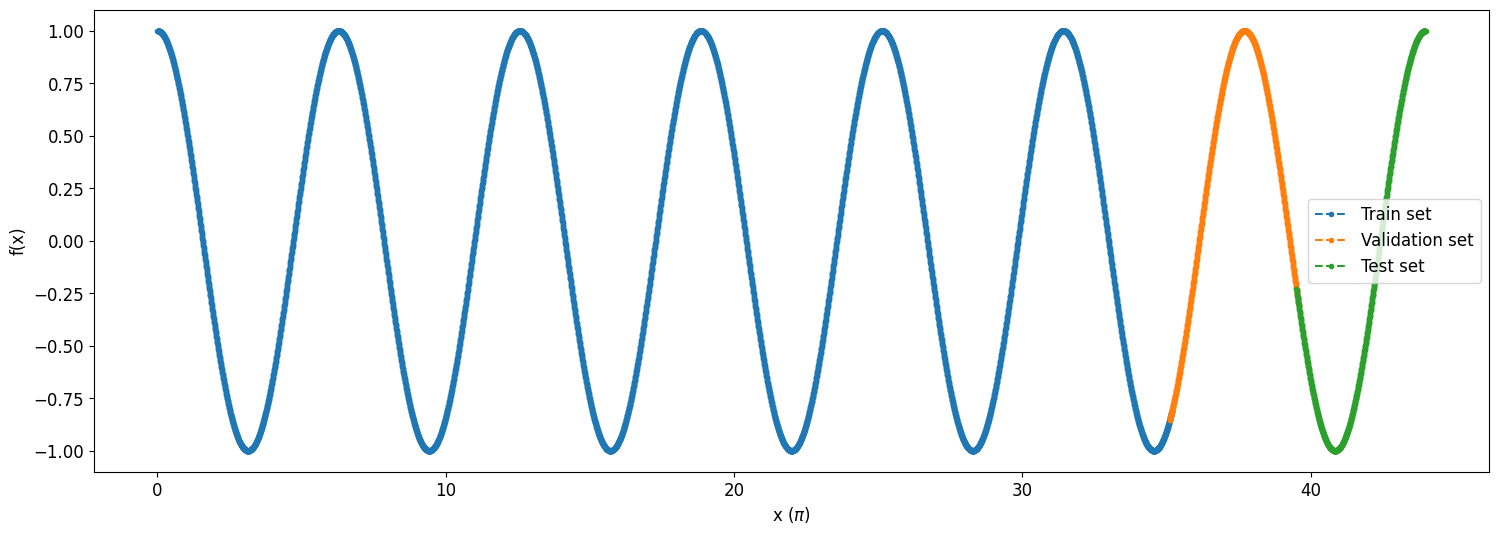

In [35]:
# plot the sets
fig = plt.figure( figsize = (18,6) )

plt.plot(t[:trainSize], train, "o--", markersize = 3, label = "Train set")
plt.plot(t[trainSize - window : trainSize + valSize], val, "o--", markersize = 3, label = "Validation set")
plt.plot(t[trainSize + valSize - window : ], test, "o--", markersize = 3, label = "Test set")

plt.ylabel("f(x)")
plt.xlabel(r"x $(\pi)$")

plt.legend()
plt.show()

In [36]:
# train
x_train, y_train = create_dataset(train, window)
print ("Train:", x_train.shape, y_train.shape)

# validation
x_val, y_val = create_dataset(val, window)
print ("Validation:", x_val.shape, y_val.shape)

# test
x_test, y_test   = create_dataset(test, window)
print ("Test:", x_test.shape, y_test.shape)

Train: (7980, 20) (7980,)
Validation: (1000, 20) (1000,)
Test: (1000, 20) (1000,)


In [37]:
np.random.seed(44)
tf.random.set_seed(44)

# convert the datasets to LSTM friendly format [samples, timesteps, features]
x_train_lstm = np.reshape(x_train, (-1, window, 1))
x_val_lstm   = np.reshape(  x_val, (-1, window, 1))
x_test_lstm  = np.reshape( x_test, (-1, window, 1))

# create a sequantial model with an LSTM layer of 100 nodes
model_20 = Sequential()
model_20.add(Input(shape = (window, 1)))
model_20.add(LSTM(100))
model_20.add(Dense(1))

# compile the model
model_20.compile(loss = "mse", optimizer = "adam")

# print the summary of the model
model_20.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# use early stopping to avoid overfitting
earlyStopping = EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)

history = model_20.fit(x_train_lstm, y_train,
                   epochs = 100, batch_size = 32,
                   validation_data = (x_val_lstm, y_val),
                   callbacks = [earlyStopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0374 - val_loss: 4.1711e-04
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8552e-04 - val_loss: 1.8246e-04
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2617e-04 - val_loss: 4.9680e-05
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5542e-05 - val_loss: 5.6116e-06
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7947e-06 - val_loss: 1.8896e-06
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.6924e-06 - val_loss: 8.8470e-07
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.9258e-06 - val_loss: 1.0961e-05
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.4943e-06 - val_loss: 7.1863e-06
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.7662e-06 - val_loss: 4.4856e-06
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.2379e-06 - val_loss: 1.1462e-05
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

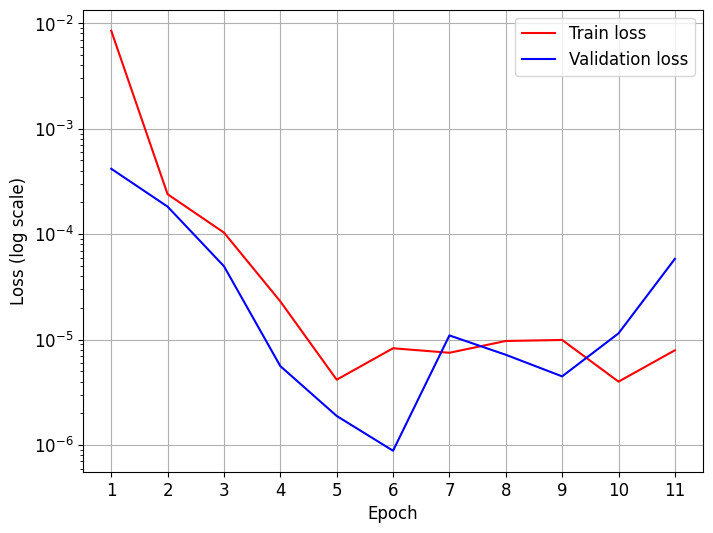

In [39]:
x_values = range(1, len(history.history['loss'])+1)
fig = plt.figure(figsize = (8,6))
plt.plot(x_values, history.history['loss'], "r-", label = "Train loss")
plt.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
plt.ylabel("Loss (log scale)")
plt.xlabel("Epoch")
plt.grid()
plt.yscale("log")
plt.xticks(x_values)
plt.legend()
plt.show()

In [40]:
prediction_horizon = 30
predictions_LSTM_20 = predictionOnPredictionLSTM(model_20, x_test_lstm[0], prediction_horizon)

In [41]:
print ("True value  Pred_20 value Error_20 (%)")
for y_true, y_pred_20 in zip(y_test[:10], predictions_LSTM_20[:10]) :
  print(f"{y_true:10.6f} {y_pred_20[0]:10.6f} {100*abs((y_pred_20[0]-y_true)/y_true):10.6f}")

True value  Pred_20 value Error_20 (%)
 -0.312780  -0.313225   0.142494
 -0.316955  -0.317428   0.149442
 -0.321123  -0.321653   0.164888
 -0.325286  -0.325894   0.186946
 -0.329442  -0.330147   0.214069
 -0.333592  -0.334409   0.244951
 -0.337736  -0.338677   0.278880
 -0.341873  -0.342950   0.315045
 -0.346003  -0.347224   0.352987
 -0.350126  -0.351500   0.392243


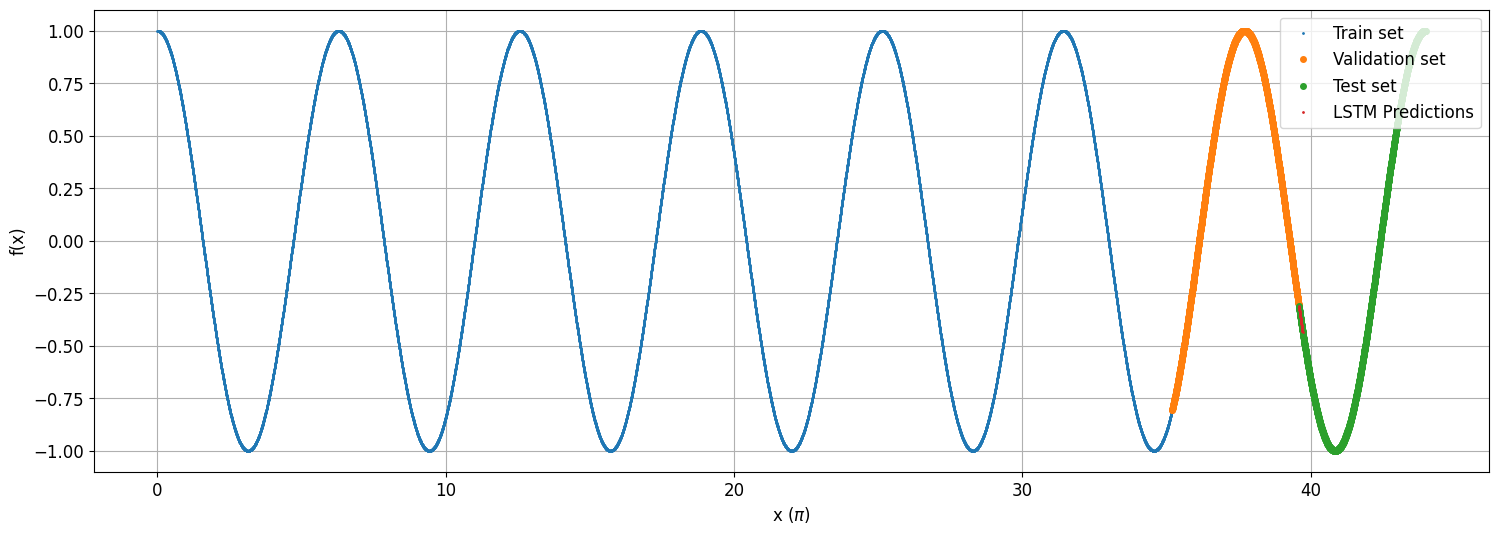

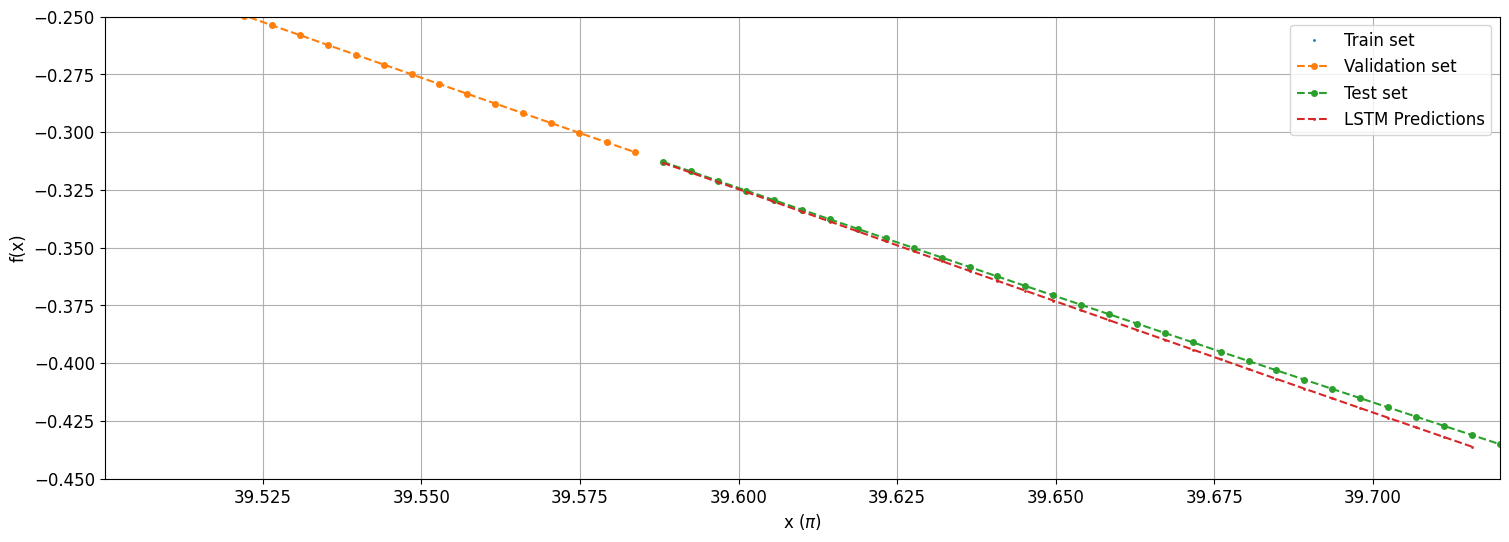

In [42]:
# plot the sequences
fig = plt.figure( figsize = (18,6) )

plt.plot(t[ : trainSize], train, "o", markersize = 1, label = "Train set")
plt.plot(t[trainSize : trainSize + valSize], y_val.flatten(), "o", markersize = 4, label = "Validation set")
plt.plot(t[trainSize + valSize : ], y_test.flatten(), "o", markersize = 4, label = "Test set")
plt.plot(t[trainSize + valSize : trainSize + valSize + prediction_horizon], predictions_LSTM_20.flatten(), "o", markersize = 1, label = "LSTM Predictions")

plt.ylabel("f(x)")
plt.xlabel(r"x $(\pi)$")

plt.legend()
plt.grid()
plt.show()

# zoom in
fig = plt.figure( figsize = (18,6) )

plt.plot(t[ : trainSize], train, "o", markersize = 1, label = "Train set")
plt.plot(t[trainSize : trainSize + valSize], y_val.flatten(), "o--", markersize = 4, label = "Validation set")
plt.plot(t[trainSize + valSize : ], y_test.flatten(), "o--", markersize = 4, label = "Test set")
plt.plot(t[trainSize + valSize : trainSize + valSize + prediction_horizon], predictions_LSTM_20.flatten(), "o--", markersize = 1, label = "LSTM Predictions")

plt.ylabel("f(x)")
plt.xlabel(r"x $(\pi)$")

plt.xlim(t[trainSize + valSize - window], t[trainSize + valSize + prediction_horizon])

plt.ylim(-0.45,-0.25)
plt.legend()
plt.grid()
plt.show()

In [43]:
# print the results of both models with window 10 and window 20
print ("Timestep True value    Pred_10    Pred_20  Error_10(%) Error_20(%)")
for i, y in enumerate(zip(y_test[:10], predictions_LSTM_10[:10], predictions_LSTM_20[:10])):
    y_true, y_pred_10, y_pred_20 = y
    print(f"    {i+1:2d}   {y_true:10.6f} {y_pred_10[0]:10.6f} {y_pred_20[0]:10.6f} {100*abs((y_pred_10[0]-y_true)/y_true):10.6f} {100*abs((y_pred_20[0]-y_true)/y_true):10.6f}")

Timestep True value    Pred_10    Pred_20  Error_10(%) Error_20(%)
     1    -0.312780  -0.313062  -0.313225   0.090155   0.142494
     2    -0.316955  -0.317298  -0.317428   0.108249   0.149442
     3    -0.321123  -0.321578  -0.321653   0.141714   0.164888
     4    -0.325286  -0.325895  -0.325894   0.187092   0.186946
     5    -0.329442  -0.330237  -0.330147   0.241335   0.214069
     6    -0.333592  -0.334600  -0.334409   0.302154   0.244951
     7    -0.337736  -0.338978  -0.338677   0.367995   0.278880
     8    -0.341873  -0.343369  -0.342950   0.437794   0.315045
     9    -0.346003  -0.347771  -0.347224   0.511007   0.352987
    10    -0.350126  -0.352182  -0.351500   0.587173   0.392243


#### Comment:
We observed that in the test set, the model with a window size of 10 performs better than the model with a window size of 20 for the first three time steps. However, as we increase the prediction horizon, the model trained with a window size of 20 becomes more stable in its predictions. Although the model with a smaller window size initially achieves better accuracy for shorter prediction horizons, the model with a larger window size exhibits improved stability and performance over longer prediction horizons. 

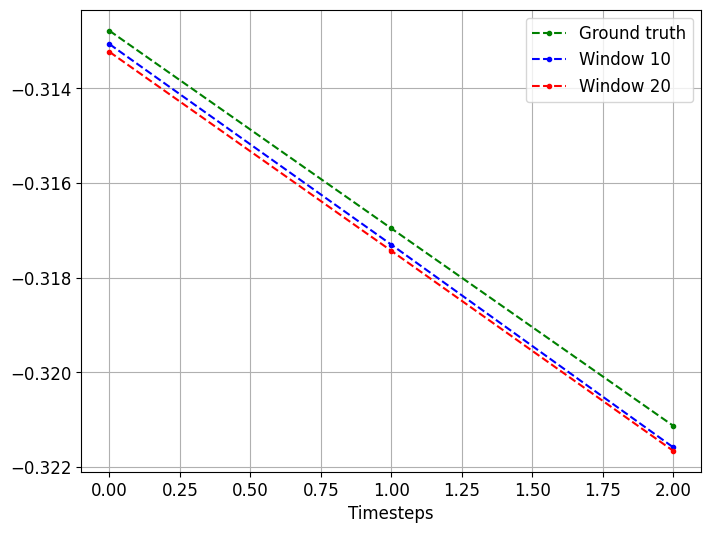

In [44]:
# plot of the first three timesteps
fig = plt.figure(figsize = (8,6))
plt.plot(y_test[:3], "g--.", label = "Ground truth")
plt.plot(predictions_LSTM_10[:3], "b--.", label = "Window 10")
plt.plot(predictions_LSTM_20[:3], "r--.", label = "Window 20")
plt.xlabel("Timesteps")
plt.grid()
plt.legend()
plt.show()

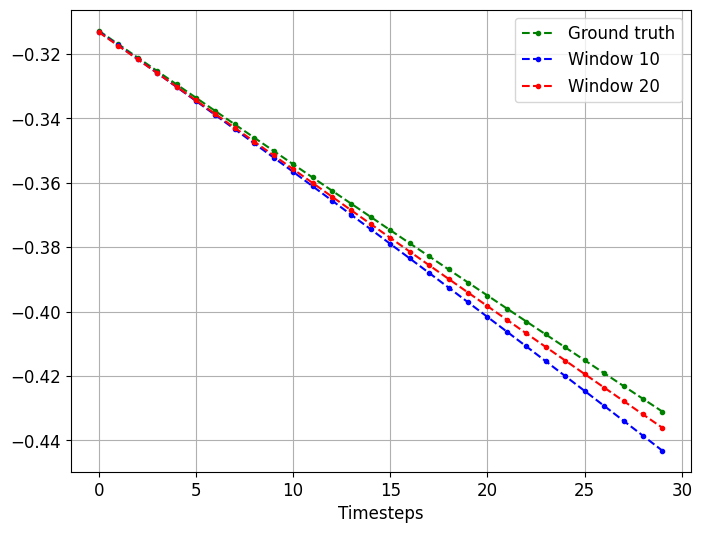

In [45]:
# plot of the prediction of the first prediction horizon
fig = plt.figure(figsize = (8,6))
plt.plot(y_test[:prediction_horizon], "g--.", label = "Ground truth")
plt.plot(predictions_LSTM_10[:prediction_horizon], "b--.", label = "Window 10")
plt.plot(predictions_LSTM_20[:prediction_horizon], "r--.", label = "Window 20")
plt.xlabel("Timesteps")
plt.grid()
plt.legend()
plt.show()